# Imports

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch data

In [2]:
#gene_info = pd.read_csv("gene_info_some_genes.txt", sep='\t',header=0)
gene_info = pd.read_csv("gene_info_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.txt", sep='\t',header=0)
len(gene_info["Gene name"])

632

In [3]:
nbr_genes=len(gene_info["Gene name"])
max_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
nbr_signif_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
sign_cutoff=0.1550258
gene_index=0
gene_info["Gene name"]
for gene in gene_info["Gene name"]:
    print(gene_index, end="\r")
    gene_folder=glob.glob("correlations/correlations_*_*_"+gene+"/")
    #print(gene_folder)
    if len(gene_folder) ==1 :
        sub_gene_index=0
        for sub_gene in gene_info["Gene name"]:
            sub_gene_file=glob.glob(gene_folder[0]+sub_gene+".csv.gz")
            #print(sub_gene_file)
            if len(sub_gene_file) ==1:
                if len(glob.glob(gene_folder[0]+sub_gene+".csv.gz.info"))==0 :
                    my_data = pd.read_csv(sub_gene_file[0], sep=',',header=0,index_col=0)
                    max_corr.values[gene_index,sub_gene_index]=my_data.abs().max().max()
                    nbr_signif_corr.values[gene_index,sub_gene_index]=np.sum(((my_data.abs())>sign_cutoff).values)
                    with open(sub_gene_file[0]+".info","w+") as f:
                        f.write(str(max_corr.values[gene_index,sub_gene_index])+"\n"+str(nbr_signif_corr.values[gene_index,sub_gene_index]))
                else:
                    with open(sub_gene_file[0]+".info","r") as f:
                        max_corr.values[gene_index,sub_gene_index] = float(f.readline().strip())
                        nbr_signif_corr.values[gene_index,sub_gene_index] = (f.readline().strip())
            sub_gene_index+=1
    gene_index+=1

max_corr.shape
print("Done!")

"""
for gene in sorted(glob.glob("correlations/correlations_*_*_*/")):
    break
    gene_index+=1
max_corr.shape"""

Done!


'\nfor gene in sorted(glob.glob("correlations/correlations_*_*_*/")):\n    break\n    gene_index+=1\nmax_corr.shape'

# Fetch data BIOGRID

In [4]:
biogrid_df = pd.read_csv("../data/BIOGRID-MV-Physical-3.5.171.tab2.txt", sep= "\t")[["Official Symbol Interactor A","Official Symbol Interactor B"]]
nbr_genes=len(gene_info["Gene name"])
interaction_matrix_biogrid=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
for index, row in biogrid_df.iterrows():
    #row=row.str.upper()
    #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])
    if gene_info["Gene name"].isin([row["Official Symbol Interactor A"]]).any() and gene_info["Gene name"].isin([row["Official Symbol Interactor B"]]).any():
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor A"],row["Official Symbol Interactor B"]]=1
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor B"],row["Official Symbol Interactor A"]]=1
        #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,14,15,16,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Show data

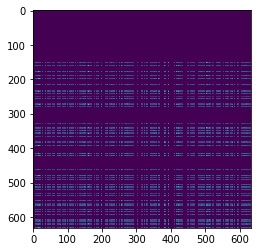

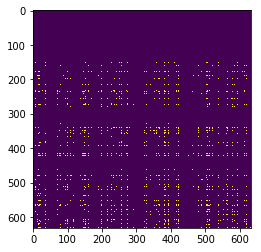

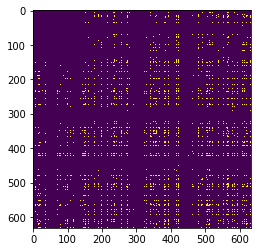

In [5]:
plt.imshow(max_corr.values)
plt.show()
plt.imshow(max_corr.values>0.3)
plt.show()
plt.imshow((max_corr.values>0.3) | np.transpose(max_corr.values>0.3))
plt.show()

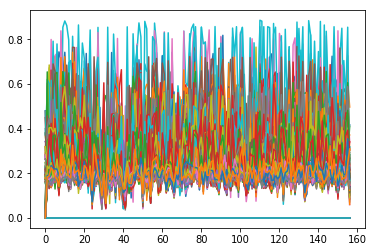

In [6]:
plt.plot(np.delete(max_corr.values,np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0))
plt.show()

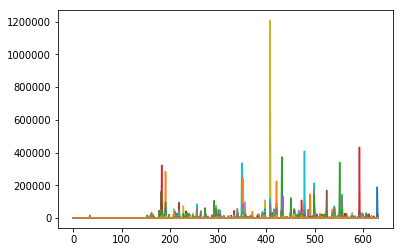

In [7]:
plt.plot(nbr_signif_corr.values)
plt.show()

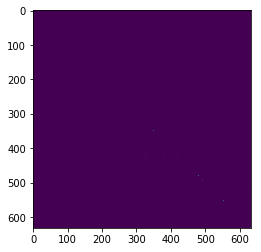

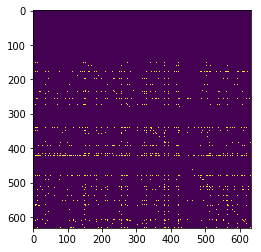

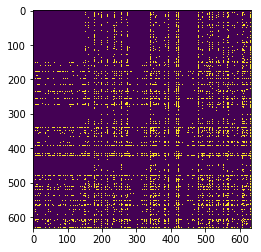

In [8]:
plt.imshow(nbr_signif_corr.values)
plt.show()
plt.imshow(nbr_signif_corr.values>3000)
plt.show()
plt.imshow((nbr_signif_corr.values>1000) | np.transpose(nbr_signif_corr.values>1000))
plt.show()

## Import and define functions

In [9]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

## Define graph for max_corr

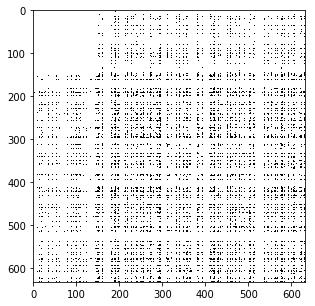

In [10]:
cutoff=0.25
G = nx.from_numpy_matrix((max_corr.values>cutoff) | np.transpose(max_corr.values>cutoff))

draw_adjacency_matrix(G)

## Define graph for nbr_signif_corr

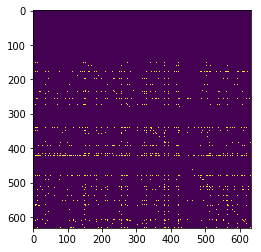

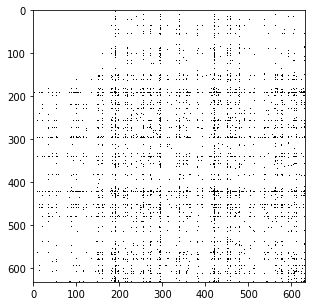

In [11]:
cutoff=3000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>3000)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on whole data

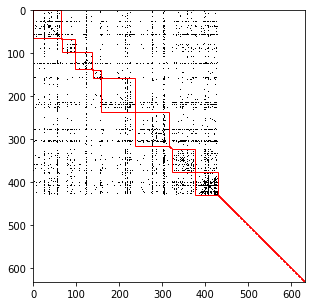

In [12]:
import numpy as np
from collections import defaultdict

import community #https://github.com/taynaud/python-louvain

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_big=[]
for commun in louvain_comms:
    louvain_comms_big.append(list(nbr_signif_corr.columns[commun]))

In [13]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    print(nbr_signif_corr.columns[commun])

Index(['HDX', 'DBP', 'SP100', 'ATF6', 'MAX', 'ESR2', 'BATF3', 'ZBTB18',
       'NHLH1', 'ETS1', 'ZNF524', 'ISX', 'ESRRA', 'ELK4', 'HIF1A', 'MYBL1',
       'SOX4', 'SP4', 'TFEB', 'NFKB1', 'ELK1', 'ZNF784', 'KLF16', 'RAX',
       'E2F1', 'ARNT', 'MIXL1', 'CDC5L', 'PITX1', 'TP53', 'GMEB2', 'LMO2',
       'NFE2L1', 'ZNF589', 'ZNF282', 'DMRT1', 'NR1H4', 'SPDEF', 'IRF6',
       'FOXJ3', 'SOX13', 'TCF7L1', 'BPTF', 'MLX', 'SOX9', 'TCF7L2', 'NR3C2',
       'TCF12', 'ZBTB7C', 'STAT5A', 'NEUROG2', 'GZF1', 'MYB', 'HMGA1', 'ATF4',
       'RARA', 'MNT', 'NFKB2', 'ARID5A', 'PPARA', 'HLTF', 'TBX4', 'HERPUD1',
       'RFX2', 'SOX18', 'MEF2C'],
      dtype='object', name='Gene name')
Index(['LHX8'], dtype='object', name='Gene name')
Index(['EBF1', 'NR5A2', 'NR4A2', 'FOXO3', 'EGR4', 'PRRX1', 'YY2', 'POU2F1',
       'TEAD3', 'CREB3L2', 'IRF1', 'LHX2', 'HOXB4', 'ARX', 'SOX15', 'RUNX1',
       'TCF7', 'POU2F2', 'THRA', 'SIX1', 'FOXO6', 'MEIS2', 'ONECUT2', 'NKX3-1',
       'HESX1', 'ELF1', 'HIC1', 'MSX1', 'C

## Delete not important data info

In [14]:
genes_to_drop=(max_corr.columns[np.sum(max_corr.values!=0, axis=1)==0])
max_corr=max_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
nbr_signif_corr=nbr_signif_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#np.delete(np.delete(max_corr.values, np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0), np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0)
#nbr_signif_corr.values

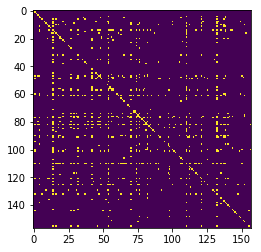

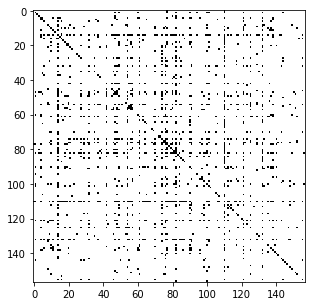

In [15]:
cutoff=11000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on part of data

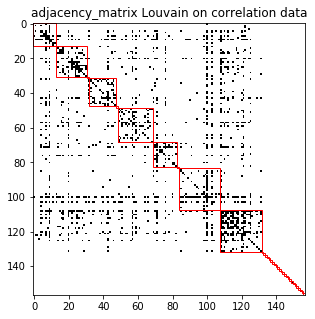

In [16]:
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on correlation data")
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

In [17]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    if len(commun) != 1 :
        print(nbr_signif_corr.columns[commun])

Index(['PRRX1', 'ESRRB', 'ELF3', 'ERF', 'DMRT1', 'FOXK1', 'CLOCK', 'TEF',
       'OLIG1', 'AIRE', 'POU4F1', 'NFATC1', 'EWSR1'],
      dtype='object', name='Gene name')
Index(['PAX3', 'GFI1B', 'PAX9', 'ZKSCAN3', 'EMX1', 'RARG', 'ZNF740',
       'ARHGEF12', 'MEF2B', 'IRX6', 'HOXB6', 'HOXA3', 'MYBL2', 'HOXA5',
       'HOXA10', 'HOXA4', 'IRF5', 'PAX6'],
      dtype='object', name='Gene name')
Index(['GLIS2', 'NKX2-5', 'LHX2', 'POU4F3', 'HLX', 'CREB3L1', 'PAX8', 'CPEB1',
       'ZNF143', 'HSF2', 'CPEB1', 'MNT', 'HIC1', 'GATA3', 'GLIS2', 'ZBTB49'],
      dtype='object', name='Gene name')
Index(['TFE3', 'ETS2', 'HOXB9', 'ARX', 'ISL2', 'IKZF3', 'STAT1', 'NR1H4',
       'SIX1', 'BPTF', 'NR3C2', 'BHLHE40', 'TEAD1', 'GSX2', 'ATF4', 'OTX1',
       'NFKB2', 'PPARG', 'DLX4', 'CEBPD'],
      dtype='object', name='Gene name')
Index(['MIXL1', 'FOXJ1', 'HEY2', 'FOXD2', 'DLX1', 'DLX2', 'FOXO6', 'ZEB1',
       'MAFG', 'WT1', 'HES7', 'ZNF713', 'RFX7', 'FOXO6'],
      dtype='object', name='Gene name')
Index

In [18]:
community.modularity(louvain_community_dict,G)

0.29439381283927823

In [19]:
#nodes_louvain_ordered

## Run Louvain on BIOGRID data

In [20]:
G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

"""plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)"""

'plt.imshow(nbr_signif_corr.values>cutoff)\nplt.show()\n\ndraw_adjacency_matrix(G)'

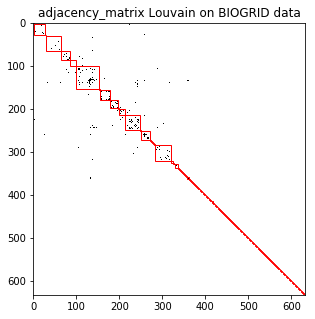

In [21]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on BIOGRID data")
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

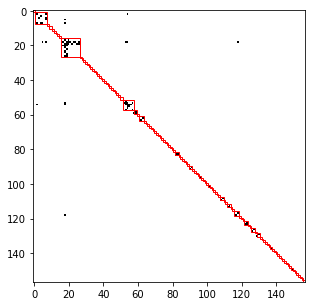

In [22]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

In [23]:
g = nx.Graph()
g.add_nodes_from(list(biogrid_df["Official Symbol Interactor A"])+list(biogrid_df["Official Symbol Interactor B"]))
for indice, x in biogrid_df.iterrows():
    print(indice,end="\r")
    g.add_edge(x["Official Symbol Interactor A"],x["Official Symbol Interactor B"])

'louvain_comms_biogrid=[]\nfor commun in louvain_comms:\n    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))'

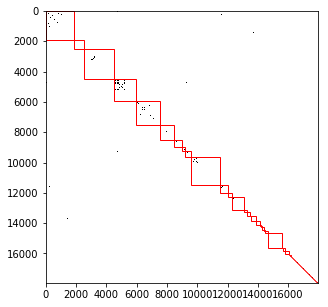

In [24]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values==1)
G=g
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
"""louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))"""

In [25]:
#print(louvain_comms)

In [26]:
for x in range(len(louvain_comms_biogrid)): 
    if len(louvain_comms_biogrid[x])>1:
        print(x)
        print (louvain_comms_biogrid[x])
        print("")

1
['PAX3', 'STAT1', 'LEF1', 'STAT5A', 'KLF4', 'MEOX1', 'PPARG']

3
['ESRRB', 'TFCP2L1']

9
['ETS2', 'NR5A1', 'SP1', 'TP53', 'NFYA', 'GATA6', 'WT1', 'GABPA', 'GATA3', 'ZBTB49', 'TFAP2A']

33
['FOXJ1', 'RFX3']

34
['ELF3', 'AR', 'STAT3', 'NFKB2', 'HIC1', 'PAX6']

35
['NFE2L1', 'MAFG']

37
['HOXA1', 'NFATC1', 'IKZF2']

56
['IRF7', 'IRF7']

63
['MEF2B', 'MEF2A']

80
['HSF4', 'HSF2']

83
['BHLHE40', 'TCF3']

86
['TEAD1', 'SOX18', 'MEF2C']

90
['POU4F1', 'EWSR1']

93
['NR2F6', 'NR2F2']

95
['FOXA2', 'HOXA5']



In [27]:
from collections import Counter

for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    print(i,end= " ")
            print(y,end= " ")
        print("\n")
        
for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        group=[]
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    group.append(i)
        c = Counter( group )
        print(c)
        #print( c.items() )
        #group.sort()
        #print(group)
        print("")

0 PRRX1 3 ESRRB 34 ELF3 38 ERF 42 DMRT1 57 FOXK1 61 CLOCK 68 TEF 70 OLIG1 73 AIRE 90 POU4F1 37 NFATC1 90 EWSR1 

1 PAX3 18 GFI1B 19 PAX9 20 ZKSCAN3 44 EMX1 45 RARG 46 ZNF740 48 ARHGEF12 63 MEF2B 75 IRX6 85 HOXB6 87 HOXA3 89 MYBL2 95 HOXA5 97 HOXA10 100 HOXA4 114 IRF5 34 PAX6 

4 110 GLIS2 5 NKX2-5 6 LHX2 11 POU4F3 15 HLX 32 CREB3L1 54 PAX8 58 92 CPEB1 77 ZNF143 80 HSF2 58 92 CPEB1 102 MNT 34 HIC1 9 GATA3 4 110 GLIS2 9 ZBTB49 

8 TFE3 9 ETS2 21 HOXB9 23 ARX 26 ISL2 28 IKZF3 1 STAT1 47 NR1H4 66 SIX1 76 BPTF 82 NR3C2 83 BHLHE40 86 TEAD1 96 GSX2 98 ATF4 99 OTX1 34 NFKB2 1 PPARG 108 DLX4 116 CEBPD 

10 MIXL1 33 FOXJ1 55 HEY2 59 FOXD2 64 DLX1 65 DLX2 67 118 FOXO6 81 ZEB1 35 MAFG 9 WT1 104 HES7 109 ZNF713 111 RFX7 67 118 FOXO6 

13 119 HBP1 16 OTP 17 CUX1 9 NR5A1 3 TFCP2L1 9 SP1 1 LEF1 9 NFYA 60 VSX2 69 SOX8 72 ZBTB6 78 ONECUT2 79 NKX3-1 80 HSF4 88 ZBTB7C 93 NR2F6 95 FOXA2 37 IKZF2 101 FOXP1 93 NR2F2 9 TFAP2A 117 CREB5 13 119 HBP1 86 MEF2C 

14 SOX30 24 GLIS3 29 RREB1 31 HOXC5 37 HOXA1 40 TFA

## Show network

In [28]:
print(nbr_signif_corr.columns)

Index(['PRRX1', 'PAX3', 'LBX2', 'ESRRB', 'GLIS2', 'NKX2-5', 'LHX2', 'PROX1',
       'TFE3', 'ETS2',
       ...
       'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18', 'FOXO6', 'HBP1', 'SOX7',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=157)


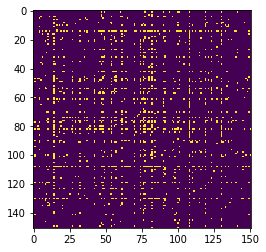

Index(['PRRX1', 'PAX3', 'LBX2', 'ESRRB', 'GLIS2', 'NKX2-5', 'LHX2', 'PROX1',
       'TFE3', 'ETS2',
       ...
       'IRF5', 'ZNF232', 'MEF2A', 'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=151)
[2, 7, 12, 24, 28, 30, 33, 34, 40, 41, 44, 58, 59, 62, 83, 93, 103, 106, 107, 118, 122, 126, 129, 132, 142, 143]


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


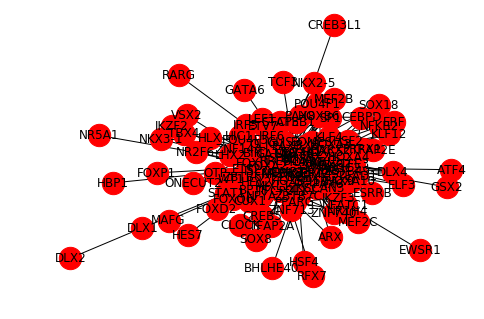

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    #edges = zip(labs[rows.tolist()], labs[cols.tolist()])
    edges = zip(gene_names[rows.tolist()], gene_names[cols.tolist()])
    #print(labs[rows.tolist()])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    #nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
nbr_signif_corr=(nbr_signif_corr.loc[~nbr_signif_corr.duplicated(),~nbr_signif_corr.duplicated()])

adjacency_matrix = (nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff)
np.fill_diagonal(adjacency_matrix,0)


#adjacency_matrix=np.delete(np.delete(adjacency_matrix,13,axis=0),13,axis=1)
plt.imshow(adjacency_matrix)
plt.show()
genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
#rm FOXA2
#genes_to_drop.append(13)
gene_names=nbr_signif_corr.columns
print(gene_names)
print(genes_to_drop)
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)

genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)


show_graph_with_labels(adjacency_matrix)

## Determine cut_off (where modularity is biggest)

## Test consistency of graph

In [31]:
from math import log

def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)

In [32]:
"""X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]
Y1 = [ [6,7,8,9,10], [2,3,4,5] ]
print(variation_of_information(X1, Y1))
# VI = 0"""

'X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]\nY1 = [ [6,7,8,9,10], [2,3,4,5] ]\nprint(variation_of_information(X1, Y1))\n# VI = 0'

In [33]:
X4 = [ [1,3],[2,4] ]
Y4 = [ [1,2], [3,4]]
print(variation_of_information(X4, Y4))
# VI = 3.322 (maximum VI is log(N) = log(4) = 1.3862943611198906)

2.0


In [34]:
log(4)

1.3862943611198906

5.145518824097021


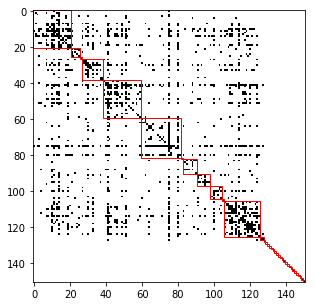

In [71]:
import random
cutoff=11000

G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

#draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small_old=louvain_comms_small
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))

In [36]:
log(135)

4.90527477843843

In [37]:
print(louvain_comms_big)
print(louvain_comms_small)

[['HDX', 'DBP', 'SP100', 'ATF6', 'MAX', 'ESR2', 'BATF3', 'ZBTB18', 'NHLH1', 'ETS1', 'ZNF524', 'ISX', 'ESRRA', 'ELK4', 'HIF1A', 'MYBL1', 'SOX4', 'SP4', 'TFEB', 'NFKB1', 'ELK1', 'ZNF784', 'KLF16', 'RAX', 'E2F1', 'ARNT', 'MIXL1', 'CDC5L', 'PITX1', 'TP53', 'GMEB2', 'LMO2', 'NFE2L1', 'ZNF589', 'ZNF282', 'DMRT1', 'NR1H4', 'SPDEF', 'IRF6', 'FOXJ3', 'SOX13', 'TCF7L1', 'BPTF', 'MLX', 'SOX9', 'TCF7L2', 'NR3C2', 'TCF12', 'ZBTB7C', 'STAT5A', 'NEUROG2', 'GZF1', 'MYB', 'HMGA1', 'ATF4', 'RARA', 'MNT', 'NFKB2', 'ARID5A', 'PPARA', 'HLTF', 'TBX4', 'HERPUD1', 'RFX2', 'SOX18', 'MEF2C'], ['LHX8'], ['EBF1', 'NR5A2', 'NR4A2', 'FOXO3', 'EGR4', 'PRRX1', 'YY2', 'POU2F1', 'TEAD3', 'CREB3L2', 'IRF1', 'LHX2', 'HOXB4', 'ARX', 'SOX15', 'RUNX1', 'TCF7', 'POU2F2', 'THRA', 'SIX1', 'FOXO6', 'MEIS2', 'ONECUT2', 'NKX3-1', 'HESX1', 'ELF1', 'HIC1', 'MSX1', 'CREB5', 'FOXO6'], ['TBX19', 'MYF6', 'PRDM4', 'ETV3', 'NKX6-3', 'NR3C1', 'BACH1', 'ZSCAN4', 'ZNF384', 'E4F1', 'TGIF2', 'BCL6B', 'NKX2-5', 'ETV2', 'SOX30', 'BRCA1', 'HINFP

In [38]:
print(variation_of_information(louvain_comms_big, louvain_comms_small))

1.5135671109535076


In [39]:
print(variation_of_information(louvain_comms_small,louvain_comms_biogrid))

3.954417884921414


In [40]:
log(19)

2.9444389791664403

In [41]:
louvain_comms_big_filtered=[]
for x in louvain_comms_big:
    for y in x:
        if y not in [item for sublist in louvain_comms_small for item in sublist]:
            x.remove(y)
    if len(x) > 0:
        louvain_comms_big_filtered.append(x)
print(louvain_comms_big_filtered)
print(louvain_comms_small)

[['DBP', 'ATF6', 'ESR2', 'ZBTB18', 'ETS1', 'ISX', 'ELK4', 'MYBL1', 'SP4', 'NFKB1', 'ZNF784', 'RAX', 'ARNT', 'MIXL1', 'PITX1', 'TP53', 'LMO2', 'NFE2L1', 'ZNF589', 'DMRT1', 'NR1H4', 'IRF6', 'SOX13', 'TCF7L1', 'BPTF', 'SOX9', 'NR3C2', 'TCF12', 'ZBTB7C', 'STAT5A', 'GZF1', 'HMGA1', 'ATF4', 'MNT', 'NFKB2', 'PPARA', 'TBX4', 'RFX2', 'SOX18', 'MEF2C'], ['NR5A2', 'FOXO3', 'PRRX1', 'POU2F1', 'CREB3L2', 'LHX2', 'ARX', 'SOX15', 'TCF7', 'THRA', 'SIX1', 'FOXO6', 'MEIS2', 'ONECUT2', 'NKX3-1', 'ELF1', 'HIC1', 'CREB5', 'FOXO6'], ['MYF6', 'ETV3', 'NR3C1', 'ZSCAN4', 'E4F1', 'BCL6B', 'NKX2-5', 'SOX30', 'HINFP', 'CREB3L1', 'ELF2', 'ZNF691', 'FOXD2', 'DLX1', 'DLX2', 'SHOX2', 'TEF', 'ATF2', 'IRF3', 'DDIT3', 'RFX1', 'HEY1', 'RFX7', 'TCF3', 'BIN1'], ['HMX3', 'MGA', 'EP300', 'TFE3', 'HBP1', 'RBPJ', 'LEF1', 'GATA6', 'GRHL1', 'HSF2', 'POU4F1', 'HBP1'], ['TBX15', 'POU2F3', 'ELF4', 'ATF3', 'MESP1', 'NEUROD2', 'USF1', 'RUNX2', 'MYEF2', 'TFAP4', 'ZNF410', 'SIX3', 'ZKSCAN3', 'RFX5', 'RXRB', 'STAT1', 'HOXC4', 'HOXA1', '

In [42]:
print(variation_of_information(louvain_comms_big_filtered, louvain_comms_small))

3.2703140939893385


In [43]:
log(19)

2.9444389791664403

In [44]:
sum(sum(nbr_signif_corr.values>3000))/(19*19)

10.759002770083102

4.996346918637854
4.90527477843843


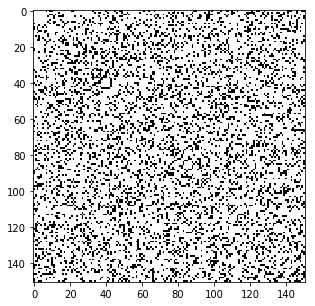

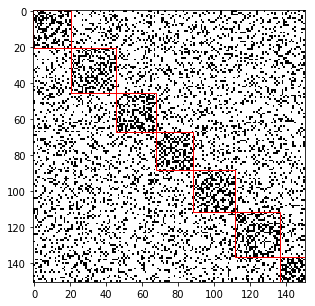

In [45]:
import random
cutoff=11000
nbr_signif_corr_noised=np.copy(nbr_signif_corr.values)
for i in range(10000):
    nbr_signif_corr_noised_old=np.copy(nbr_signif_corr_noised)
    while (nbr_signif_corr_noised_old == nbr_signif_corr_noised).all():
        x,y=random.randrange(0,len(nbr_signif_corr_noised)),random.randrange(0,len(nbr_signif_corr_noised))
        nbr_signif_corr_noised[x,y]= (cutoff+1) if (random.random()<0.13 and nbr_signif_corr_noised[x,y]<=cutoff) else 0 if (random.random()>0.13 and nbr_signif_corr_noised[x,y]>cutoff) else nbr_signif_corr_noised[x,y]


G = nx.from_numpy_matrix((nbr_signif_corr_noised>cutoff) | np.transpose(nbr_signif_corr_noised>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))
print(log(135))

[0, 6, 7, 11, 21, 33, 42, 47, 55, 68, 79, 81, 95, 96, 99, 104, 109, 110, 113, 142, 143, 1, 2, 3, 10, 16, 32, 36, 39, 41, 53, 72, 77, 78, 83, 87, 88, 107, 111, 118, 122, 127, 128, 134, 141, 144, 4, 13, 14, 20, 40, 45, 50, 56, 60, 64, 65, 73, 82, 84, 86, 91, 92, 94, 97, 108, 115, 119, 5, 22, 27, 37, 38, 49, 51, 59, 62, 63, 74, 90, 112, 117, 123, 124, 132, 136, 137, 147, 148, 8, 12, 15, 17, 26, 31, 44, 48, 57, 71, 76, 80, 98, 114, 120, 121, 131, 133, 138, 139, 140, 146, 149, 9, 18, 19, 23, 25, 29, 30, 34, 46, 52, 54, 58, 61, 66, 70, 85, 89, 93, 100, 103, 105, 106, 126, 129, 130, 24, 28, 35, 43, 67, 69, 75, 101, 102, 116, 125, 135, 145, 150]


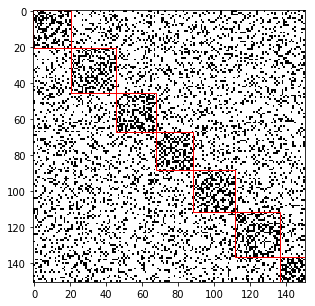

In [46]:
nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
print((nodes_louvain_ordered))

# Test for patient community detection based on expression

In [47]:
import pandas as pd
import numpy as np
gene_expr = pd.read_csv("expression_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.tsv", sep='\t',header=0,index_col=0)
gene_expr=gene_expr.drop(['Gene_Symbol', 'Chr', 'Coord'],axis=1)
nbr_cluster=7
cluster_mean=np.zeros([nbr_cluster,gene_expr.shape[0]])
nbr_individuals=gene_expr.shape[1]
#individual_clusters=np.arange(nbr_individuals)%7
individual_clusters=np.round((np.arange(462)+1)/66-0.5).astype(int)
individual_clusters_old=np.zeros(nbr_individuals)
print(nbr_cluster, nbr_individuals,individual_clusters)

7 462 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [48]:
nbr_boucle=0
while not (individual_clusters==individual_clusters_old).all() :
    nbr_boucle+=1
    individual_clusters_old=np.copy(individual_clusters)
    for x, y in enumerate(cluster_mean):
        cluster_mean[x]=np.mean(gene_expr.values[:,individual_clusters==x],axis=1)
        #print((cluster_mean[x]))
    for x, y in enumerate(individual_clusters):
        individual_clusters[x]=np.argmin([np.linalg.norm(gene_expr.values[:,x]-cluster_mean[cluster]) for cluster in range(nbr_cluster)])
        #individual_clusters[x]=
    print((individual_clusters==individual_clusters_old).all())

print(nbr_boucle)

False
False
False
False
False
False
False
False
False
False
False
False
True
13


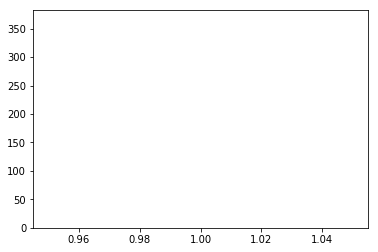

In [110]:
import matplotlib.pyplot as plt
plt.hist(np.std(gene_expr.values,axis=1))
plt.show()

In [51]:
from collections import Counter
Counter(kmeans1.labels_)

Counter({4: 76, 2: 102, 6: 95, 3: 47, 1: 98, 5: 39, 0: 5})

In [52]:
#individual_clusters1=(individual_clusters)

In [53]:
import matplotlib.pyplot as plt
plt.scatter(individual_clusters1+(np.random.randn(nbr_individuals)/6), individual_clusters+(np.random.randn(nbr_individuals)/6))
plt.show()

NameError: name 'individual_clusters1' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(kmeans2.labels_+(np.random.randn(nbr_individuals)/6), ward.labels_+(np.random.randn(nbr_individuals)/6))
plt.show()

In [61]:
for x in range(len(gene_expr.index)):
    gene_expr.rename(index={gene_expr.index[x]:gene_expr.index[x].split('.')[0]}, inplace=True)
    line=np.where(gene_info.values[:,0]==gene_expr.index[x])
    gene_expr.rename(index={gene_expr.index[x]:gene_info.values[line[0][0],5]}, inplace=True)
    #gene_expr.index[x]=gene_info.values[,5]

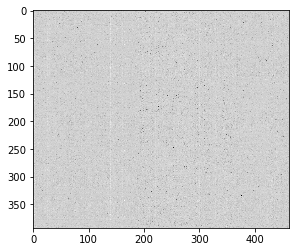

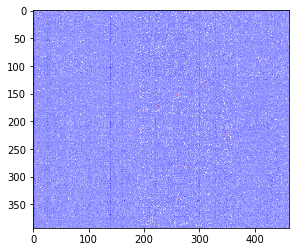

In [124]:
x=gene_expr.values
x=np.transpose(np.transpose(x)-x.mean(axis=1))
x=np.transpose(np.transpose(x)/x.std(axis=1))
pyplot.imshow(x,
              cmap="Greys",
              interpolation="none")
plt.show()
pyplot.imshow(gene_expr.values,
              cmap="bwr",
              interpolation="none")
plt.show()
gene_expr=pd.DataFrame(x,columns=gene_expr.columns,index=gene_expr.index)

In [157]:
def mean_distance(kmeans, values):
    kmeans.labels_, kmeans.cluster_centers_
    distance=0
    for x in range(len(kmeans.labels_)):
        distance+=np.linalg.norm(values[x]-kmeans.cluster_centers_[kmeans.labels_[x]])
    return distance

In [212]:
nbr_cluster=100
from sklearn.cluster import KMeans, AgglomerativeClustering
nbr_tries=100
kmeans = KMeans(n_clusters=nbr_cluster).fit(gene_expr.T)
distance = mean_distance(kmeans, gene_expr.T.values)
for x in range(nbr_tries):
    kmeans_temp = KMeans(n_clusters=nbr_cluster).fit(gene_expr.T)
    distance_temp = mean_distance(kmeans_temp, gene_expr.T.values)
    if distance_temp<distance:
        distance=distance_temp
        kmeans=kmeans_temp
ward = AgglomerativeClustering(n_clusters=nbr_cluster, linkage='ward').fit(gene_expr.T)
individuals_sorted_ward=sorted(range(len(ward.labels_)), key=lambda k: ward.labels_[k])
individuals_sorted_kmeans=sorted(range(len(kmeans.labels_)), key=lambda k: kmeans.labels_[k])

In [214]:
gene_expr.shape

(393, 462)

/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


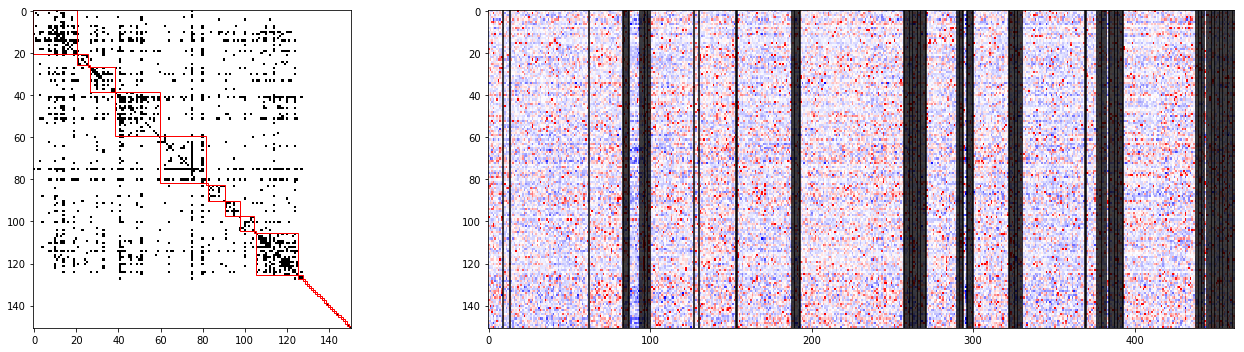

In [213]:
(G, node_order, partitions, colors)=(G, nodes_louvain_ordered, [louvain_comms], ["red"])
from matplotlib.gridspec import GridSpec
adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

#Plot adjacency matrix in toned-down black and white
fig = pyplot.figure(figsize=(20, 5)) # in inches
gs = GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
plt.subplot(121)
pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")


# The rest is just if you have sorted nodes by a partition and want to
# highlight the module boundaries
assert len(partitions) == len(colors)
ax = pyplot.gca()
for partition, color in zip(partitions, colors):
    current_idx = 0
    for module in partition:
        ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
        current_idx += len(module)

ax1 = fig.add_subplot(gs[1:, 0])
plt.subplot(122)
adjacency_matrix = gene_expr.loc[nbr_signif_corr.index[nodes_louvain_ordered]].iloc[:,individuals_sorted_kmeans].values
pyplot.imshow(np.clip((adjacency_matrix),-3,3),
              interpolation="none",
              cmap="bwr",
             aspect='auto')

xline=0
for x in np.unique(kmeans.labels_, return_counts=True)[1]:
    xline+=x
    plt.axvline(x=xline-1, color='k')

fig.tight_layout()
fig.show()
#plt.show()

In [59]:
nbr_signif_corr.index[nodes_louvain_ordered]

Index(['PRRX1', 'LHX2', 'PROX1', 'POU4F3', 'HOXB9', 'TP53', 'HOXA1', 'DMRT1',
       'IRF6', 'GATA6',
       ...
       'VSX2', 'CLOCK', 'FOXO6', 'MYBL2', 'POU4F1', 'HOXA4', 'EWSR1', 'GATA3',
       'PAX6', 'MEF2C'],
      dtype='object', name='Gene name', length=151)

normalized mutual information
kmeans ++
optimal k
deribayesian
kmeans for all genes (not only interesting ones)
factorisation 